In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/japan_earthquake.csv')

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-07T05:40:18.427Z,41.2743,142.4175,48.313,4.5,mb,75.0,170.0,0.925,0.44,...,2025-06-07T05:57:38.040Z,"100 km ENE of Yokohama, Japan",earthquake,7.53,8.913,0.069,62.0,reviewed,us,us
1,2025-06-05T14:51:27.092Z,37.8455,141.6463,77.626,4.7,mb,52.0,135.0,2.974,0.49,...,2025-06-05T21:31:12.576Z,"63 km E of Sōma, Japan",earthquake,9.73,7.589,0.060,85.0,reviewed,us,us
2,2025-06-04T19:55:18.959Z,42.2891,144.7117,33.990,4.6,mb,68.0,134.0,1.188,0.99,...,2025-06-04T21:09:56.040Z,"81 km SSE of Kushiro, Japan",earthquake,7.15,5.518,0.054,101.0,reviewed,us,us
3,2025-06-04T02:39:41.193Z,29.6234,140.7056,126.201,4.6,mb,62.0,100.0,2.835,1.21,...,2025-06-04T02:55:11.040Z,"Izu Islands, Japan region",earthquake,7.83,8.042,0.072,57.0,reviewed,us,us
4,2025-06-03T13:18:27.625Z,41.7994,143.5407,38.169,5.0,mww,165.0,79.0,0.358,0.64,...,2025-06-03T13:36:52.040Z,"57 km SSE of Hiroo, Japan",earthquake,5.46,5.625,0.098,10.0,reviewed,us,us


In [ ]:
df.shape

(11412, 22)

In [ ]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,3907
gap,1
dmin,6183
rms,76


In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11412.000000,11412.000000,11412.000000,11412.000000,7505.000000,11411.000000,5229.000000,11336.000000,4637.000000,9358.000000,5082.000000,9604.000000
mean,37.746651,142.297430,48.590370,4.804055,117.664757,103.732968,2.323688,0.825975,7.108018,6.757883,0.088987,59.875781
std,4.266010,4.246786,64.202823,0.367955,114.092492,36.910110,1.573640,0.210958,1.972212,5.170472,0.054016,83.291545
min,29.383300,125.058000,0.000000,4.500000,6.000000,8.000000,0.038000,0.120000,1.400000,0.000000,0.019000,1.000000
25%,35.579600,141.012200,17.500000,4.600000,42.000000,79.000000,1.143000,0.690000,5.900000,3.600000,0.054000,12.000000
50%,37.374900,142.090700,35.000000,4.700000,76.000000,112.800000,2.036000,0.810000,7.100000,5.600000,0.075000,29.000000
75%,39.848100,143.575325,52.307500,4.900000,151.000000,129.700000,3.028000,0.940000,8.300000,8.000000,0.107000,73.000000
max,47.214000,153.016000,644.879000,9.100000,918.000000,277.000000,20.734000,1.880000,15.900000,62.300000,0.700000,884.000000


In [ ]:
df.drop(columns=[
    'net','type','status','locationSource','magSource',
    'id','updated','horizontalError','dmin','magError','place'
],inplace=True)

<Axes: xlabel='nst', ylabel='Count'>

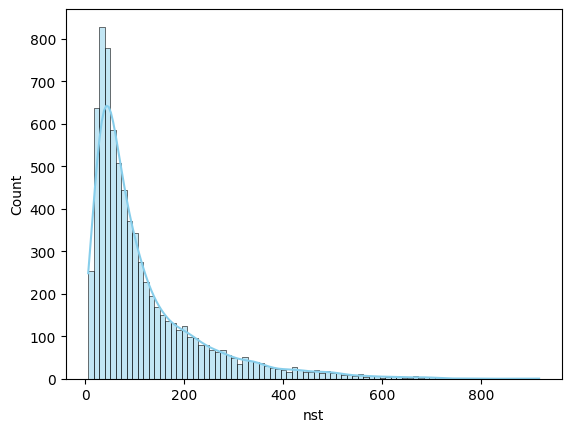

In [ ]:
sns.histplot(df['nst'],kde=True,color='skyblue')

<Axes: xlabel='magNst', ylabel='Count'>

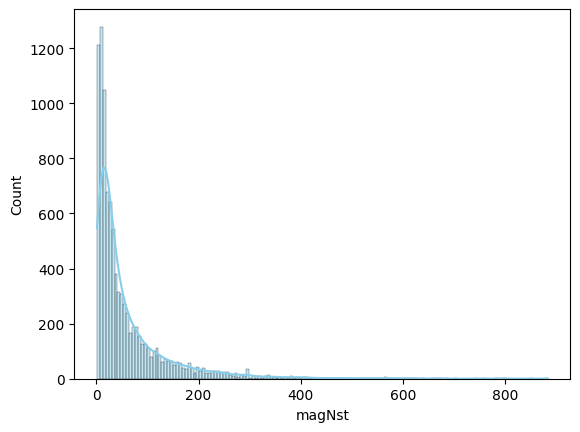

In [ ]:
sns.histplot(df['magNst'],kde=True,color='skyblue')

<Axes: xlabel='depthError', ylabel='Count'>

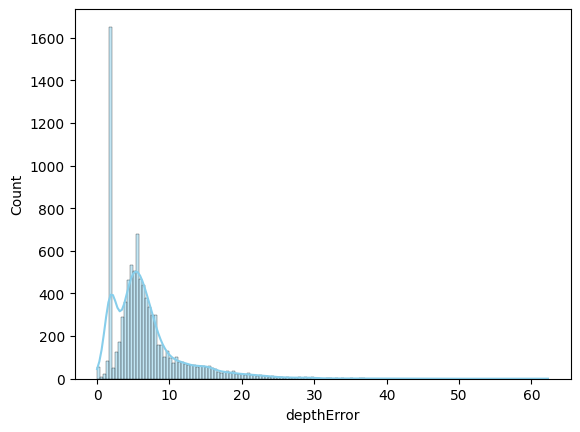

In [ ]:
sns.histplot(df['depthError'],kde=True,color='skyblue')

In [ ]:
for col in ['nst','magNst','depthError']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,1
rms,76
depthError,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst
0,2025-06-07T05:40:18.427Z,41.2743,142.4175,48.313,4.5,mb,75.0,170.0,0.44,8.913,62.0
1,2025-06-05T14:51:27.092Z,37.8455,141.6463,77.626,4.7,mb,52.0,135.0,0.49,7.589,85.0


In [ ]:
df['year'] = df['time'].str.split('-').str[0].astype(int)
df['month'] = df['time'].str.split('-').str[1].astype(int)

In [ ]:
df['day'] = df['time'].str.split('-').str[2].str.split('T').str[0].astype(int)

In [ ]:
df['hour']=df['time'].str.split('T').str[1].str.split(':').str[0].astype(int)
df['minute']=df['time'].str.split('T').str[1].str.split(':').str[1].astype(int)

In [ ]:
df['second']=df['time'].str.split('T').str[1].str.split(':').str[2].str.split('.').str[0].astype(int)

In [ ]:
df.drop('time',inplace=True,axis=1)

In [ ]:
df.head(2)

,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst,year,month,day,hour,minute,second
0,41.2743,142.4175,48.313,4.5,mb,75.0,170.0,0.44,8.913,62.0,2025,6,7,5,40,18
1,37.8455,141.6463,77.626,4.7,mb,52.0,135.0,0.49,7.589,85.0,2025,6,5,14,51,27


In [ ]:
df['magType'].unique()

array(['mb', 'mww', 'mwr', 'mwb', 'mwc', 'ms', 'm'], dtype=object)

In [ ]:
df.shape

(11336, 16)

In [ ]:
df['magType'].value_counts()

,count
magType,
mb,9021
mww,857
mwc,747
mwr,526
mwb,173
m,7
ms,5


In [ ]:
df['mag'].value_counts()

,count
mag,
4.5,2609
4.6,2284
4.7,1714
4.8,1292
4.9,1003
5.0,601
5.1,397
5.2,318
5.3,238


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('mag',axis=1)
y = df['mag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
## OHE
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,drop='first')
X_train_ohe = ohe.fit_transform(X_train[['magType']])
X_test_ohe = ohe.transform(X_test[['magType']])

In [ ]:
X_train_ohe = pd.DataFrame(X_train_ohe,columns=ohe.get_feature_names_out(),index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe,columns=ohe.get_feature_names_out(),index=X_test.index)

In [ ]:
X_train_ohe

,magType_mb,magType_ms,magType_mwb,magType_mwc,magType_mwr,magType_mww
4812,1.0,0.0,0.0,0.0,0.0,0.0
7951,0.0,0.0,1.0,0.0,0.0,0.0
10576,1.0,0.0,0.0,0.0,0.0,0.0
715,1.0,0.0,0.0,0.0,0.0,0.0
2473,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11360,0.0,0.0,0.0,0.0,1.0,0.0
5191,1.0,0.0,0.0,0.0,0.0,0.0
5390,1.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.drop(columns=['magType'],inplace=True)
X_test.drop(columns=['magType'],inplace=True)

In [ ]:
X_train = pd.concat([X_train,X_train_ohe],axis=1)
X_test = pd.concat([X_test,X_test_ohe],axis=1)

In [ ]:
X_train.head()

,latitude,longitude,depth,nst,gap,rms,depthError,magNst,year,month,day,hour,minute,second,magType_mb,magType_ms,magType_mwb,magType_mwc,magType_mwr,magType_mww
4812,45.8735,151.5018,67.10,76.0,101.0,0.72,7.200,17.0,2014,4,23,17,42,3,1.0,0.0,0.0,0.0,0.0,0.0
7951,38.9500,142.3610,35.00,403.0,50.7,0.70,5.600,29.0,2011,3,27,13,41,34,0.0,0.0,1.0,0.0,0.0,0.0
10576,46.4480,152.9030,10.00,60.0,136.2,1.18,5.600,19.0,2007,12,31,6,30,48,1.0,0.0,0.0,0.0,0.0,0.0
715,29.6776,139.9596,10.00,22.0,165.0,0.98,1.928,11.0,2023,10,2,20,56,6,1.0,0.0,0.0,0.0,0.0,0.0
2473,39.2140,140.4584,139.47,76.0,116.0,0.89,7.800,210.0,2019,4,21,4,2,43,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,latitude,longitude,depth,nst,gap,rms,depthError,magNst,year,month,day,hour,minute,second,magType_mb,magType_ms,magType_mwb,magType_mwc,magType_mwr,magType_mww
1396,42.7583,146.5208,36.970,76.0,127.0,0.45,7.400,73.0,2022,2,27,11,11,8,1.0,0.0,0.0,0.0,0.0,0.0
543,37.8385,144.3904,29.218,51.0,128.0,0.65,5.169,55.0,2023,12,17,16,17,6,1.0,0.0,0.0,0.0,0.0,0.0
6211,45.2390,147.6090,110.400,580.0,13.8,0.73,3.400,29.0,2012,3,12,12,32,46,0.0,0.0,0.0,0.0,0.0,1.0
4731,42.4935,146.1009,10.000,76.0,87.0,0.98,1.900,65.0,2014,6,29,16,34,22,1.0,0.0,0.0,0.0,0.0,0.0
6720,36.2560,141.3380,28.000,403.0,63.5,0.81,5.600,29.0,2011,9,15,8,0,9,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9068 entries, 4812 to 7270
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     9068 non-null   float64
 1   longitude    9068 non-null   float64
 2   depth        9068 non-null   float64
 3   nst          9068 non-null   float64
 4   gap          9068 non-null   float64
 5   rms          9068 non-null   float64
 6   depthError   9068 non-null   float64
 7   magNst       9068 non-null   float64
 8   year         9068 non-null   int64  
 9   month        9068 non-null   int64  
 10  day          9068 non-null   int64  
 11  hour         9068 non-null   int64  
 12  minute       9068 non-null   int64  
 13  second       9068 non-null   int64  
 14  magType_mb   9068 non-null   float64
 15  magType_ms   9068 non-null   float64
 16  magType_mwb  9068 non-null   float64
 17  magType_mwc  9068 non-null   float64
 18  magType_mwr  9068 non-null   float64
 19  magType_

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Xgboost Regressor": XGBRegressor()

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2221
- Mean Absolute Error: 0.1495
- R2 Score: 0.6316
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2265
- Mean Absolute Error: 0.1516
- R2 Score: 0.6369


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3659
- Mean Absolute Error: 0.2536
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3759
- Mean Absolute Error: 0.2598
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2221
- Mean Absolute Error: 0.1495
- R2 Score: 0.6316
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2265
- Mean Absolute Error: 0.1516
- R2 Score: 0.6369


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1816
- Mean Absolute Error: 0.1231
- R2 Score: 0.7537
----------------------

In [ ]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [ ]:
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params)

                   ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                n_jobs=-1,
                                verbose=2,
                                cv=3)

    random.fit(X_train,y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
        print(f"---------------- Best Params for {model_name} -------------------")
        print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
84 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [ ]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None,
                                                     n_jobs=-1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0660
- Mean Absolute Error: 0.0460
- R2 Score: 0.9675
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1783
- Mean Absolute Error: 0.1259
- R2 Score: 0.7751




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(256, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.05),
    Dense(128, activation='elu', kernel_regularizer=l2(1e-4)),
    Dropout(0.05),
    Dense(128, activation='elu', kernel_regularizer=l2(1e-4)),
    Dropout(0.05),
    Dense(64,  activation='elu', kernel_regularizer=l2(1e-4)),
    Dense(1,   activation='linear')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,105 (246.50 KB)

 Trainable params: 63,105 (246.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

opt =  tensorflow.keras.optimizers.Adam(learning_rate=0.0005)


model.compile(optimizer=opt,
              loss='mse',
              metrics=['mse'])

early_stopping = EarlyStopping(
    monitor='val_loss',    # Watch validation loss
    patience=30,
    restore_best_weights=True # Use the best model instead of the last one
)


In [ ]:
history  = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=300,callbacks=[early_stopping])

Epoch 1/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 5.2406 - mse: 5.2015 - val_loss: 0.1359 - val_mse: 0.0966
Epoch 2/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1949 - mse: 0.1557 - val_loss: 0.0961 - val_mse: 0.0568
Epoch 3/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1317 - mse: 0.0925 - val_loss: 0.0968 - val_mse: 0.0578
Epoch 4/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1176 - mse: 0.0786 - val_loss: 0.0885 - val_mse: 0.0496
Epoch 5/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0962 - mse: 0.0574 - val_loss: 0.0857 - val_mse: 0.0471
Epoch 6/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0959 - mse: 0.0574 - val_loss: 0.0904 - val_mse: 0.0522
Epoch 7/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0889 - mse: 0.0508 - val_loss: 0.0824 - val_mse: 0.0446
Epoch 8/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0889 - mse: 0.0512 - val_loss: 0.0813 - val_mse: 0.0440
Epoch 9/300
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms

In [ ]:

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

print('='*35)


284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model performance for Training set
- Root Mean Squared Error: 0.1635
- Mean Absolute Error: 0.1172
- R2 Score: 0.8004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1828
- Mean Absolute Error: 0.1252
- R2 Score: 0.7636
